<a href="https://colab.research.google.com/github/SESCDS/sescds/blob/master/Part%202/Lesson%202/Lesson2_sgd_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *

#  Линейная регрессия

Хотим аппроксимировать набор точек прямой линией

Создадим случайный точки. Для начала зададим количество точек:

In [0]:
n=100

Теперь зададим случайные координаты. Уравнение прямой в привычной вам форме такое: y = kx + b. Зададим случайные значения $x_i$, потом посчитаем $y_i =  kx_i + b$ для каждой точки i = 0 ... 99

In [65]:
x = torch.ones(n).uniform_(-1.,1)
x

tensor([-0.7797,  0.8223,  0.1215, -0.6274, -0.5832, -0.8956,  0.4791, -0.4520,
         0.1618, -0.3309,  0.2681,  0.5881, -0.4663, -0.1812,  0.4069, -0.2156,
        -0.9513,  0.0220,  0.9847, -0.7969,  0.4921,  0.0505,  0.5858, -0.3651,
        -0.5923,  0.4373, -0.1555,  0.0730,  0.8369, -0.8781, -0.6013,  0.5419,
        -0.9543,  0.5634,  0.3437, -0.0123, -0.1542,  0.1583,  0.9791, -0.9075,
        -0.0735,  0.8261, -0.7520,  0.8814,  0.7799, -0.3399, -0.9765, -0.1899,
        -0.0096, -0.7784,  0.5362, -0.6281,  0.2259, -0.2188, -0.7222,  0.7958,
        -0.1841, -0.3631,  0.6360,  0.1057, -0.9113, -0.9655, -0.2303, -1.0000,
        -0.8807, -0.8904,  0.0249, -0.5933, -0.2388,  0.3703,  0.6127,  0.4242,
        -0.5160, -0.1828,  0.1869, -0.1002,  0.9318, -0.5989, -0.4659,  0.6973,
        -0.1588,  0.8174,  0.4643,  0.7009, -0.6090, -0.5841, -0.0795, -0.6765,
         0.0454, -0.0545,  0.3087, -0.9945, -0.3185, -0.2256, -0.2158,  0.5559,
        -0.3494, -0.2317, -0.1326, -0.56

Командой *x = torch.ones(n)* мы сначала создали *тензор* длиной n, состоящий из единиц. То есть сразу создали **вектор х** = $x_0, x_1, ... , x_{99}$.
Потом командой *.uniform_(-1.,1)* изменили его так, что он превратился в случайные числа в диапазоне (-1, 1). 

Тензор - это массив, который может быть одномерным (вектор), двумерным (вектор из векторов, или матрица), трехмерным, и т.д. Например, черно-белое изображение размером (1920, 1080) - это двумерный тензор, матрица из пикселей. А цветное изобржаение - это уже трехмерный тензор размером (1920, 1080, 3) к которому добавляется измерение цвета - каналы R, G, B.

Теперь посчитаем $y_i$

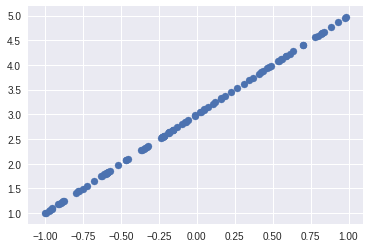

In [66]:
k = 2
b = 3
y = k*x+b
plt.scatter(x, y)

Сработало, но хотелось бы немного усложнить задачу: добавить шум.

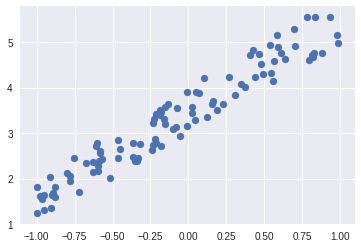

In [67]:
y = y + torch.rand(n)
plt.scatter(x, y)

А теперь попробуем более универсальный подход. 
Запишем уравнение прямой так: $y_i = x_{0,i}w_0 + x_{1,i}w_1$ Это ни что иное, как скалярное произведение двух векторов: **y$_i$** = **x$_i$w**. Обратите внимание, что значение $x_{0,i}$ у нас всегда должно быть равно единице в таком подходе. 
Создадим X сразу как двумерный тензор. Это массив из 100 строк и 2 столбцов:
>$x_{0,0}$ $x_{1,0}$

>$x_{0,1}$ $x_{1,1}$

>...

>$x_{0,99}$ $x_{1,99}$

In [68]:
X = torch.ones(n,2) 
X[:,1].uniform_(-1.,1)
X[:5]

tensor([[ 1.0000,  0.1440],
        [ 1.0000,  0.6023],
        [ 1.0000, -0.1325],
        [ 1.0000, -0.9939],
        [ 1.0000,  0.4026]])

Всё пратически так же, но .uniform_ применяем только к одному из столбцов

 Теперь создадим **вектор** весов **w_real**. real - потому что как будто это наши "настоящие" веса, и мы будем пытаться их найти.

In [69]:
w_real = tensor(3.,2);
w_real

tensor([3., 2.])

Теперь нам надо перемножить одно на другое. 
>$y_0 = x_{0,0}w_0 + x_{1,0}w_1$

>$y_1 = x_{0,1}w_0 + x_{1,1}w_1$

>...

>$y_{99} = x_{0,99}w_0 + x_{1,99}w_1$

Массив размером (100, 2) нужно умножить на массив размером (2). Есть оператор, который сразу сделает это - @

In [0]:
y = X@w_real 
y = y+ torch.rand(n) #добавим шум

Эта операция называется *матричное произведение*. Подробнее матрицы и операции с ними вы изучите на 1-м курсе университета, пока нам нужно знать две вещи:
1. Можно умножить матрицу A размером (n, m) на матрицу B размером (m, k) - получится матрица C размером (n, k). То есть один из размеров должен быть одинаковый. В нашем случае мы умножаем матрицу на вектор, вектор можно представить как матрицу (m, 1)
2. A@B **не** равно B@A

Есть хорошая визуализация: http://matrixmultiplication.xyz/
Сделайте там массив шириной 2 и любой высоты, умножьте на массив шириной 1 и высотой 2 - наглядно увидите, как это работает в нашем случае. Естественно, можете посмотреть и для других параметров.

Вот пара примеров:


In [71]:
A = torch.rand(5,3)
B = torch.rand(3,2)
C = A@B
C, C.shape

(tensor([[0.8917, 0.5447],
         [0.9592, 0.4853],
         [0.7808, 0.3625],
         [1.1331, 0.9294],
         [0.7175, 0.4909]]), torch.Size([5, 2]))

То есть мы как бы схлопываем матрицы по измерению с размером 3.
Если переставим множители, получим ошибку:

In [72]:
B@A

RuntimeError: ignored

Теперь вернемся к нашей задаче. Построим график X, y, убедимся, что результат тот же. Поскольку нулевой стобец X нас не интересует, он вспомогательный, то строим только первый:

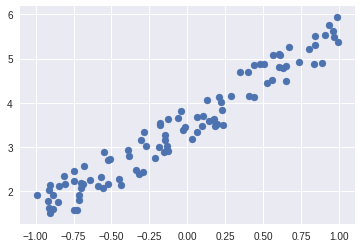

In [73]:
plt.scatter(X[:,1], y);

Как видим, получили примерно то же самое.
Теперь хотим найти *параметры* (веса) `w` такие, чтобы минимизировать *ошибку* между реальными значениями **y_hat** и предсказаниями **y = X@w**. В качестве функции ошибок используем *среднеквадратическое отклонение*

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Зададим какие-то веса. Это начальная точка, их можно взять случайными, потом методом градиентного спуска будем приближать к реальным.

In [0]:
w = tensor(5.,-1.)

Сделаем предсказания с помощью этих весов, посчитаем ошибку:

In [76]:
y_hat = X@w
mse(y_hat, y)

tensor(5.7849)

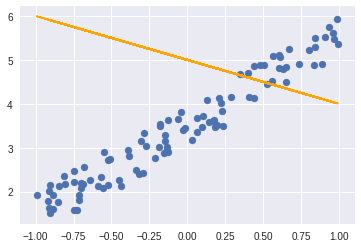

In [77]:
plt.scatter(X[:,1],y)
plt.plot(X[:,1],y_hat, color='orange');

# Градиентный спуск

Теперь напишем функцию, которая осуществит градиентный спуск. План такой:
1. Делаем предсказания y_hat по текущему значению весов w
2. Считаем функцию ошибок
3. Находим направление антиградиента для весов
4. Прибавляем к весам значения антиградиента, умноженные на шаг lr

In [0]:
def update1(w):
  #1
  y_hat = X@w
  
  #2
  loss = mse(y, y_hat)
  if t % 10 == 0: print(loss) #каждый десятый шаг будем выводить функцию ошибок, чтобы убедиться, что она уменьшается
    
  #3 Вспомните, как считается градиент для нашей функции ошибок. Если эта строка непонятна, 
  #  не поленитесь, распишите производные сначала для каждого y_i, потом еще раз прочитайте про матричное умножение и сведите к векторной форме 
  grad_w = (X@w - y)@X
  grad_w = grad_w/grad_w.norm()# нормируем градиент, чтобы это был единичный вектор, который только показывает направление
  
  #4
  with torch.no_grad(): #что значит эта строка, мы разберем чуть позже
    w-=lr*grad_w #здесь достаточно обычного умножения, потому что lr - скаляр

In [79]:
w = tensor(5.,-1)
lr = 5e-2
for t in range(100): 
  update1(w)

tensor(5.7849)
tensor(4.0311)
tensor(2.6714)
tensor(1.6662)
tensor(0.9598)
tensor(0.4880)
tensor(0.2034)
tensor(0.0881)
tensor(0.0852)
tensor(0.0852)


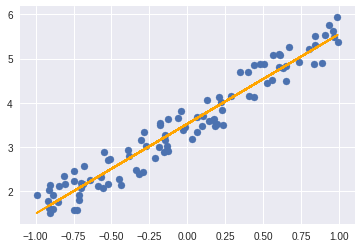

In [80]:
plt.scatter(X[:,1],y)
plt.plot(X[:,1],X@w, c='orange');

## Анимация

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [82]:
w = tensor(5.,-1)
lr = 5e-2
fig = plt.figure()
plt.scatter(X[:,1], y, c='orange')
line, = plt.plot(X[:,1], X@w)
plt.close()

def animate(i):
    update1(w)
    line.set_ydata(X@w)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

#Домашнее задание - реализовать стохастический градиентный спуск

Идея очень простая - на каждом шаге считаем градиент не по всем точкам, а по случайно выборке из них. 

Используйте следующую функцию:

In [52]:
torch.randperm(n)

tensor([37, 21, 18, 45, 16, 11, 53, 74, 17,  2, 81, 10, 34, 94, 98, 47,  8, 82,
        24,  0, 96, 13, 69, 87, 50, 79,  5, 92,  4, 97, 70, 29, 22,  6, 35, 76,
        52, 71, 99, 39, 88, 66, 64, 75, 14, 95, 59, 54, 56, 77, 86,  7,  1, 67,
        19,  9, 55, 36, 84, 62, 38, 90, 26, 33, 83, 44, 78, 58, 41, 40, 60, 85,
        23,  3, 30, 32, 25, 80, 49, 48, 57, 89, 46, 65, 28, 20, 72, 12, 61, 68,
        15, 91, 93, 31, 63, 43, 51, 27, 42, 73])

Она возвращает целые числа от 0 до n-1 в случайном порядке. Используйте её для выбора случайных строк из X.
Пример: создаем индекс, в данном случае два числа, и выбираем X c такими индексами 

In [53]:
index = torch.randperm(n)[:2]
print(index)
X[index, :]

tensor([ 7, 38])


tensor([[ 1.0000, -0.3532],
        [ 1.0000,  0.1870]])

Теперь у вас есть всё, чтобы написать свою функцию. Передайте в неё параметр bs - размер выборки из X. Напишите код и посмотрите, как влияет на обучение размер выборки, соотношение шага и размера выборки.

In [0]:
def update_sgd(w, bs):
  

# Нейросеть

Это реализация простой нейросети. Она для следующего урока.

In [0]:
N, D_in, H, D_out = 100, 1, 50, 1
x = torch.ones(N,D_in+1) 
x[:,1].uniform_(-1.,1)
y = (x[:,1]**3 + x[:,1]**2 -x[:,1] - 1 + torch.ones(N).uniform_(-1,1)*0.2).unsqueeze(1)
W1 = torch.ones(D_in+1, H).uniform_(-1.,1)
W2 = torch.ones(H, D_out).uniform_(-1.,1)
relu = torch.nn.ReLU()

In [0]:
with torch.no_grad():
  for t in range(20001):

    h = 1/(1+torch.exp(-x@W1))
    y_pred = (h@W2)
    loss = mse(y, y_pred)
    if t%1000==0: print(t,loss)

    grad_y_pred = 2*(y_pred-y)
    grad_W2 = (torch.transpose(h,0,1)@grad_y_pred); grad_W2 = grad_W2/grad_W2.norm()
    grad_h = grad_y_pred@torch.transpose(W2,0,1)
    grad_W1 = torch.transpose(x,0,1)@(grad_h*h*(1-h)); grad_W1 = grad_W1/grad_W1.norm()

    W1-=1e-3*grad_W1
    W2-=1e-3*grad_W2

0 tensor(1.6247)
1000 tensor(0.1194)
2000 tensor(0.0688)
3000 tensor(0.0339)
4000 tensor(0.0229)
5000 tensor(0.0162)
6000 tensor(0.0143)
7000 tensor(0.0141)
8000 tensor(0.0140)
9000 tensor(0.0140)
10000 tensor(0.0140)
11000 tensor(0.0139)
12000 tensor(0.0139)
13000 tensor(0.0139)
14000 tensor(0.0139)
15000 tensor(0.0139)
16000 tensor(0.0139)
17000 tensor(0.0138)
18000 tensor(0.0138)
19000 tensor(0.0138)
20000 tensor(0.0138)


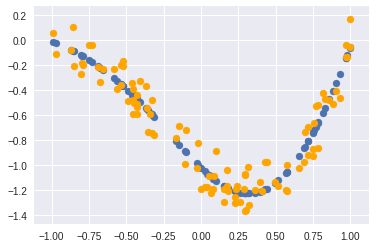

In [0]:
plt.scatter(x[:,1],y_pred)
plt.scatter(x[:,1],y,color='orange')